# **Trabajo Práctico Nº 3 Parte 2: Pruebas estadísticas para validar la sucesión de números pseudoaleatorios**
Simulación - Ingeniería en Sistemas de Información 2023

**Metodología de trabajo**

Antes de empezar a trabajar, debe crear una copia de este cuaderno de la siguiente manera:

*  Click en File (Archivo)
*  Save a Copy in Drive (Guardar una copia en Drive)
*  Renombre el archivo con el el/los apellido/s del grupo: Apellido1_Apellido2_Apellido3. Ipynb

Cada actividad debe desarrollarse en forma  individual pero se fomenta el intercambio de opiniones y trabajo colaborativo en clase

# Ejercicio 1

El siguiente código contiene el algoritmo incompleto de la prueba Chi Cuadrada. Complete el mismo en todos los lugares donde aparezca ???.

In [39]:
import statistics

def prueba_chi2(sucesion: list[float], chi2: float) -> None:
    chi2_suma = 0

    # Calcula media esperada a partir de la sucesion de números observados
    frec_esperada= statistics.mean(sucesion)
    print("La frecuencia esperada es ", frec_esperada)
    
    # Determina el valor chi cuadrada a partir de cada elemento de la sucesión de números observados y la frecuencia esperada
    for elemento in sucesion:
        chi2_suma = chi2_suma + (((elemento-frec_esperada)**2)/frec_esperada)

    # Criterio de aceptación
    if chi2_suma < chi2:
        print("La hipotesis se acepta. El estadístico calculado a partir de la observación es ",  chi2_suma ," < que el estadístico de la tabla: ", chi2)
    else: 
        print("La hipotesis se rechaza. El estadístico calculado a partir de la observación es ", chi2_suma ," > que el estadístico de la tabla: ", chi2)
    

def main() -> None:
    sucesion1=[]

    i = int(input("Ingrese la cantidad de intervalos para aplicar la prueba de la Chi Cuadrada: "))

    for _ in range(i):
            cantidad=int(input("Ingrese la cantidad de números observados en cada intervalo:"))
            sucesion1.append(cantidad)

    chi2 = float(input("Ingrese el valor del estadístico de la Chi Cuadrada: "))

    prueba_chi2(sucesion1, chi2)  
 
if __name__ == "__main__":
    main()

## Ejercicio 2

Escriba el código para desarrollar el algoritmo de la prueba de Kolmogorov Smirnov.

> a.	El usuario debe indicar la cantidad de números aleatorios a la que se someterá la prueba.

> b.	El usuario debe ingresar el valor del estadístico de la tabla

Se pueden generar los números aleatorios, sin necesidad de ingresar los mismos. Para ello incorpore el módulo random de la librería de Python (import random).

Indicar si se acepta o rechaza la prueba.



## Respuesta

### Imprimir expresiones matemáticas en pantalla

A continuación se muestra la función `print_latex()` la cual se utilizará en los ejercicios 2 y 3 para imprimir expresiones matemáticas con [LaTeX](https://es.wikipedia.org/wiki/LaTeX).

In [40]:
from IPython.display import display, Markdown

def print_latex(text: str) -> None:
    display(Markdown(text))

### Prueba de Kolmogorov-Smirnov

El código para desarrollar el algoritmo de la prueba de Kolmogorov Smirnov es el siguiente.

In [41]:
import numpy as np
from matplotlib import pyplot as plt


def _kolmogorov_distance(sorted_random_numbers: np.ndarray) -> float:
    n = len(sorted_random_numbers)
    d = np.max(np.arange(1, n+1)/n - sorted_random_numbers)
    return d

def _kolmogorov_graph(sorted_random_numbers: np.ndarray) -> None:
    n = len(sorted_random_numbers)
    line = np.arange(1, n+1) / n 
    _, ax = plt.subplots(figsize=(10, 5))
    line1, = ax.plot(sorted_random_numbers, label="Número Aleatorio ($\mu_i$)")
    line2, = ax.plot(line, label=r"Frecuencia Esperada ($\frac{i}{n}$)")
    ax.legend(handles=[line1, line2])

def kolmogorov_test(random_numbers: np.ndarray, statistic: float) -> None:
    # Compute kolmogorov distance
    random_numbers.sort()
    distance = _kolmogorov_distance(np.sort(random_numbers))

    # Print results
    distance_text = r"$max|\frac{i}{n} - \mu_i|" + f" = {distance}$"
    statistic_text = f"$D(\\alpha, n={len(random_numbers)}) = {statistic}$"

    if distance < statistic:
        print_latex(f"{distance_text} < {statistic_text} $\\Rightarrow$ La hipótesis se acepta.")
    else:
        print_latex(f"{distance_text} > {statistic_text} $\\Rightarrow$ La hipótesis se rechaza.")

    # Show plot
    _kolmogorov_graph(random_numbers)

#### Explicación del código
- `_kolmogorov_distance()` calcula el valor $max|\frac{i}{n} - \mu_i|$ para una secuencia de números. Recibe como parámetro la secuencia de números aleatorios en orden creciente (debe estar contenida en un arreglo de [*NumPy*](https://numpy.org/doc/stable/user/index.html#user)).
- `_kolmogorov_graph()` grafica la secuencia de números. El eje-*y* representa el valor del número aleatorio (es decir, $x_i$), y el eje-*x* representa la posición del número aleatorio (es decir, el índice $i$). Recibe como parámetro la seucencia de números aleatorios en orden creciente contenido en un arreglo.
- `kolmogorov_test()` recibe una secuencia de números aleatorios (como un arreglo) y el valor del estadístico, y muestra en pantalla si la secuencia pasa el test de Kolmogorov.

**Nota:** Para ejecutar el script debe llamarse a la función `kolmogorov_test()`. Las funciones `_kolmogorov_distance()` y `_kolmogorov_graph()` estan pensadas unicamente para el funcionamiento interno del script, y no deberían ser ejecutadas por el usuario (por ese motivo, el nombre de estas funciones comienza con un [guión bajo](https://stackoverflow.com/questions/1547145/defining-private-module-functions-in-python)).

#### Resolución de un ejercicio

Comprobemos el funcionamiento del algoritmo con el siguiente ejercicio.

**Enunciado:**

Realice la prueba de Kolmogorov Smirnov (K-S) para los siguientes valores e indique si los mismos pasan la prueba de aleatoriedad.

$\alpha = 0.1$

| 0.45 | 0.43 | 0.86 | 0.10 | 0.26 | 0.06 | 0.38 | 0.73 | 0.42 | 0.87 |
|------|------|------|------|------|------|------|------|------|------|
| 0.15 | 0.97 | 0.59 | 0.82 | 0.39 | 0.51 | 0.47 | 0.04 | 0.65 | 0.16 |

**Respuesta:**


|  i |  $\frac{i}{n}$ |   $\mu$  | $D$ |
|:--:|:----:|:----:|:-----------:|
| 1  | 0.05 | 0.04 | 0.01        |
| 2  | 0.1  | 0.06 | 0.04        |
| 3  | 0.15 | 0.1  | 0.05        |
| 4  | 0.2  | 0.15 | 0.05        |
| 5  | 0.25 | 0.16 | 0.09        |
| 6  | 0.3  | 0.26 | 0.04        |
| 7  | 0.35 | 0.38 | 0.03        |
| 8  | 0.4  | 0.39 | 0.01        |
| 9  | 0.45 | 0.42 | 0.03        |
| 10 | 0.5  | 0.43 | 0.07        |
| 11 | 0.55 | 0.45 | 0.1         |
| 12 | 0.6  | 0.47 | 0.13        |
| 13 | 0.65 | 0.51 | 0.14        |
| 14 | 0.7  | 0.59 | 0.11        |
| 15 | 0.75 | 0.65 | 0.1         |
| 16 | 0.8  | 0.73 | 0.07        |
| 17 | 0.85 | 0.82 | 0.03        |
| 18 | 0.9  | 0.86 | 0.04        |
| 19 | 0.95 | 0.87 | 0.08        |
| 20 | 1    | 0.97 | 0.03        |

Como $max|\frac{i}{n} - \mu_i| = 0.14 < D(\alpha = 0.1, n=16) = 0.26474$, aceptamos la hipotesis.

**Código:**
A continuación, utilizamos el código presentado anteriormente para realizar el ejercicio. Para ello, debemos llamar a la funcion `kolmogorov_test()` con los datos requeridos: el arreglo con números aleatorios y el valor del estadístico.

$max|\frac{i}{n} - \mu_i| = 0.14$ < $D(\alpha, n=20) = 0.26474$ $\Rightarrow$ La hipótesis se acepta.

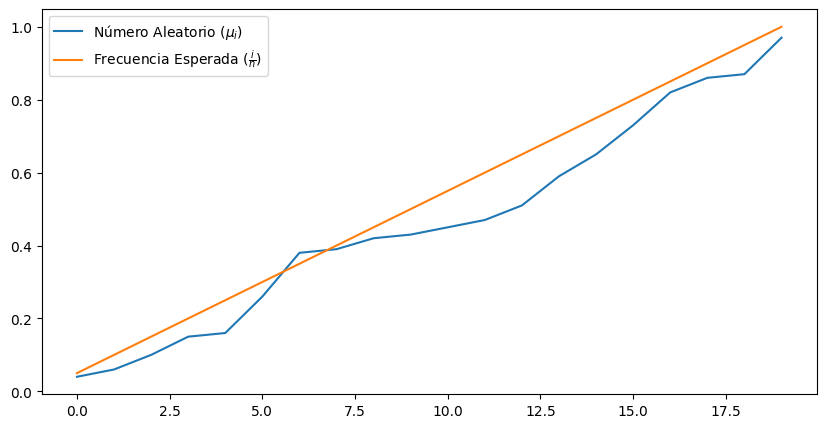

In [42]:
arr = np.array([0.45, 0.43, 0.86, 0.1, 0.26, 0.06, 0.38, 0.73, 0.42, 0.87, 0.15, 0.97, 0.59, 0.82, 0.39, 0.51, 0.47, 0.04, 0.65, 0.16])
statistic = 0.26474
kolmogorov_test(arr, statistic)

### Menú para la prueba de Kolmogorov-Smirnov

Como se pide en el ejercicio, se desarrolló un menú para que el usuario pueda indicar la cantidad de números aleatorios que se someterá a la prueba (el usuario no ingresará los números aleatorios, se generará la secuencia automáticamente) e ingrese el valor del estadístico de la tabla. 

**Nota:** para el correcto funcionamiento del código, se deben haber ejecutado las celdas que contienen la funciones `print_latex()` y `kolmogorov_test()`.

Ingrese la cantidad de números aleatorios: 20
Ingrese la semilla: 44
Ingrese el valor del estadístico de la tabla: 10
Los números aleatorios generados son:
[0.12256551 0.25811307 0.40577073 0.96918395 0.16231712 0.85729367
 0.16304527 0.33796195 0.67772282 0.61653417 0.95493616 0.41140078
 0.93964181 0.92674869 0.71557174 0.01946211 0.7973993  0.90075519
 0.52386282 0.19716269]



$max|\frac{i}{n} - \mu_i| = 0.05283731109151646$ < $D(\alpha, n=20) = 10.0$ $\Rightarrow$ La hipótesis se acepta.

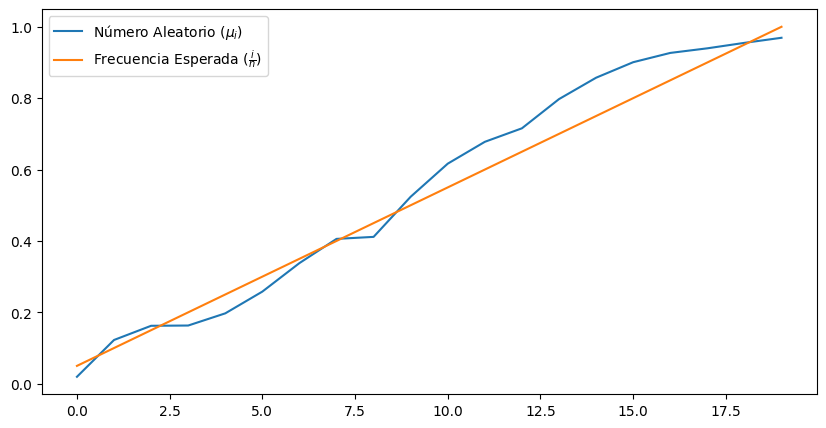

In [43]:
def kolmogorov_test_menu() -> None:
    # Get random numbers
    n = int(input("Ingrese la cantidad de números aleatorios: "))
    seed = int(input("Ingrese la semilla: "))
    rng = np.random.default_rng(seed=seed)
    random_numbers = rng.random(n)

    # Get statistic
    statistic = float(input("Ingrese el valor del estadístico de la tabla: "))

    # Run test
    print(f"Los números aleatorios generados son:\n{random_numbers}", end="\n\n")
    kolmogorov_test(random_numbers, statistic)

if __name__ == "__main__":
    kolmogorov_test_menu()

# Ejercicio 3

Escriba el código para desarrollar el algoritmo del test de rachas.

> a.	El usuario debe indicar la cantidad de números aleatorios.

> b.	El usuario debe indicar el valor del estadístico de la tabla Normal.

A partir de los datos ingresados, se generan los números aleatorios, se cuentan los números que están por debajo y por encima de la media, el valor de racha, media, desviación estándar y se obtiene el estadístico con los valores observados.

Indicar si se acepta o rechaza la prueba.


In [44]:
from scipy import stats

def _wald_wolfowitz_runs(random_numbers: np.ndarray) -> tuple[np.ndarray, int, int]:
    mean = random_numbers.mean()
    # Positive and negative
    positive = np.where(random_numbers > mean, 1, 0).sum()
    negative = np.where(random_numbers <= mean, 1, 0).sum()
    # Runs
    runs_array = np.where(random_numbers > mean, 1, -1)
    runs_array = np.split(
        random_numbers, 
        np.where(np.diff(runs_array) != 0)[0] + 1
    )
    return runs_array, positive, negative

def _wald_wolfowitz_z(total_runs: int, positive: int, negative: int) -> float:
    total_random_numbers = positive + negative
    mean = 2 * positive * negative / total_random_numbers + 1/2
    variance = 2 * positive * negative * (2 * positive * negative - total_random_numbers)
    variance /= total_random_numbers**2 * (total_random_numbers - 1)
    z = (total_runs - mean) / np.sqrt(variance)
    return z

def runs_test(random_numbers: np.ndarray, alpha: float) -> None:
    # Get runs
    runs_array, positive, negative = _wald_wolfowitz_runs(random_numbers)    
    z = _wald_wolfowitz_z(len(runs_array), positive, negative)

    # Compute statistic Z
    if alpha > 0.5:
        raise ValueError("El valor de significancia debe ser menor o igual a 0.5")
    statistic = -stats.norm.ppf(alpha / 2)

    # Print results
    runs_text = " ".join([str(run) for run in runs_array])
    statistic_text = r"$Z_{\alpha/2}$"
    
    print(f"Rachas: {runs_text}")
    print_latex(f"$b = {len(runs_array)}$ (cantidad de rachas)")
    print_latex(f"$n_1 = {positive}$ (cantidad de números positivos)")
    print_latex(f"$n_2 = {negative}$ (cantidad de números negativos)")
    print_latex(f"{statistic_text} = {statistic}")
    print_latex(r"$Z_0 = \frac{b - \mu_b}{\sigma_b}" + f" = {z}$")
    
    if np.abs(z) <= statistic:
        print_latex(f"-{statistic_text} $\leq Z_0 \leq$ {statistic_text} $\\Rightarrow$ La hipótesis se acepta.")
    elif z > 0:
        print_latex(f"$Z_0 >$ {statistic_text} $\\Rightarrow$ La hipótesis se rechaza.")
    elif z < 0:
        print_latex(f"$Z_0 <$ -{statistic_text} $\\Rightarrow$ La hipótesis se rechaza.")

#### Explicación del código
- `_wald_wolfowitz_runs()` calcula las rachas $b$, la cantidad de números positivos $n_1$ y la cantidad de números negativos $n_2$. Recibe como parámetro la secuencia de números aleatorios (contenida en un arreglo).
- `_wald_wolfowitz_z()` calcula el valor $Z_0 = \frac{b - \mu_b}{\sigma_b}$ dado el número total de rachas $b$, la cantidad de números positivos $n_1$ y la cantidad de números negativos $n_2$.
- `runs_test()` recibe una secuencia de números aleatorios (como un arreglo) y el valor de significancia $\alpha$ (se calcula automaticamente el valor del estadístico $Z_{\alpha / 2}$). Muestra en pantalla si la secuencia pasa el test de rachas.

**Nota:** Para ejecutar el script debe llamarse a la función `runs_test()`. Las funciones `_wald_wolfowitz_runs()` y `_wald_wolfowitz_z()` estan pensadas unicamente para el funcionamiento interno del script, y no deberían ser ejecutadas por el usuario (por ese motivo, el nombre de estas funciones comienza con un [guión bajo](https://stackoverflow.com/questions/1547145/defining-private-module-functions-in-python)).

#### Resolución de un ejercicio

Comprobemos el funcionamiento del algoritmo con el siguiente ejercicio.

**Enunciado:**

Realice la prueba de rachas para los siguientes valores e indique si los mismos pasan la prueba de aleatoriedad.

| 0.12 | 0.44 | 0.41 | 0.88 | 0.77 | 0.9 | 0.55 | 0.14 | 0.83 | 0.87 |
|------|------|------|------|------|-----|------|------|------|------|

$\alpha = 0.05$

$Z_{\alpha / 2} = 1.96$

**Respuesta:**

A continuación, utilizamos el código presentado anteriormente para realizar el ejercicio. Para ello, debemos llamar a la función `runs_test()` con los datos requeridos: el arreglo con números aleatorios y el valor del estadístico.

In [55]:
arr = np.array([0.12, 0.44, 0.41, 0.88, 0.77, 0.9, 0.55, 0.14, 0.83, 0.87])
alpha = 0.05
runs_test(arr, alpha)

Rachas: [0.12 0.44 0.41] [0.88 0.77 0.9 ] [0.55 0.14] [0.83 0.87]


$b = 4$ (cantidad de rachas)

$n_1 = 5$ (cantidad de números positivos)

$n_2 = 5$ (cantidad de números negativos)

$Z_{\alpha/2}$ = 1.9599639845400545

$Z_0 = \frac{b - \mu_b}{\sigma_b} = -1.0062305898749053$

-$Z_{\alpha/2}$ $\leq Z_0 \leq$ $Z_{\alpha/2}$ $\Rightarrow$ La hipótesis se acepta.

### Menú para la prueba de Rachas

Como se pide en el ejercicio, se desarrolló un menú para que el usuario pueda indicar la cantidad de números aleatorios que se someterá a la prueba (el usuario no ingresará los números aleatorios, se generará la secuencia automáticamente) e ingrese el valor del estadístico de la tabla. 

**Nota:** para el correcto funcionamiento del código, se deben haber ejecutado las celdas que contienen la funciones `print_latex()` y `runs_test()`.

In [48]:
def runs_test_menu() -> None:
    # Get random numbers
    n = int(input("Ingrese la cantidad de números aleatorios: "))
    seed = int(input("Ingrese la semilla: "))
    rng = np.random.default_rng(seed=seed)
    random_numbers = rng.random(n)

    # Get statistic
    statistic = float(input("Ingrese el valor de significancia (alpha): "))

    # Run test
    print(f"Los números aleatorios generados son:\n{random_numbers}\n")
    runs_test(random_numbers, statistic)

if __name__ == "__main__":
    runs_test_menu()

Ingrese la cantidad de números aleatorios: 10
Ingrese la semilla: 44
Ingrese el valor de significancia (alpha): 0.05
Los números aleatorios generados son:
[0.12256551 0.25811307 0.40577073 0.96918395 0.16231712 0.85729367
 0.16304527 0.33796195 0.67772282 0.61653417]

Rachas: [0.12256551 0.25811307 0.40577073] [0.96918395] [0.16231712] [0.85729367] [0.16304527 0.33796195] [0.67772282 0.61653417]


$b = 6$ (cantidad de rachas)

$n_1 = 4$ (cantidad de números positivos)

$n_2 = 6$ (cantidad de números negativos)

$Z_{\alpha/2}$ = 1.9599639845400545

$Z_0 = \frac{b - \mu_b}{\sigma_b} = 0.49170755108038944$

-$Z_{\alpha/2}$ $\leq Z_0 \leq$ $Z_{\alpha/2}$ $\Rightarrow$ La hipótesis se acepta.